In [4]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 MB 602.4 kB/s eta 0:00:0000:0100:11
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.5/980.5 kB 651.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 710.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 703.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 714.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 701.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 714.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 677.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 679.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 715.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 713.3 kB/s eta 0:00:0000:0100:01
     ━━

In [1]:
from PIL import Image, ImageOps
from keras import premade_models
from keras.models import load_model
import numpy as np
import cv2

2023-03-14 10:14:17.903491: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
pip list


Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.2.1
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backc

Note: you may need to restart the kernel to use updated packages.


In [2]:
def model_predict(img_path):
    np.set_printoptions(suppress=True)
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image = Image.open(img_path)
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    
    model = load_model('Models/PleaseWork2.h5')
    
    preds = ""
    prediction = model.predict(data)
    if np.argmax(prediction)==0:
        preds = f"Apple Overripe"
    elif np.argmax(prediction)==1:
        preds = f"Apple Ripe"
    elif np.argmax(prediction)==2:
        preds = f"Apple Unripe"
    elif np.argmax(prediction)==3:
        preds = f"Banana Overripe"
    elif np.argmax(prediction)==4:
        preds = f"Banana Ripe"
    elif np.argmax(prediction)==5:
        preds = f"Banana Unripe"
    elif np.argmax(prediction)==6:
        preds = f"Orange Overripe"
    elif np.argmax(prediction)==7:
        preds = f"Orange Ripe"
    elif np.argmax(prediction)==8:
        preds = f"Orange Unripe"
    elif np.argmax(prediction)==9:
        preds = f"Raspberry Overripe"
    elif np.argmax(prediction)==10:
        preds = f"Raspberry Ripe"
    elif np.argmax(prediction)==11:
        preds = f"Raspberry Unripe"
    elif np.argmax(prediction)==12:
        preds = f"Strawberry Overripe"
    elif np.argmax(prediction)==13:
        preds = f"Strawberry Ripe"
    else :
        preds = f"Strawberry Unripe"

    return preds

In [3]:
from IPython.display import Image as img123

In [5]:
cam = cv2.VideoCapture(0)
cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k % 256 == 27:
        print("Escape hit, closing app ")
        break
    elif k % 256 == 32:
        img_name = f"opencv_frame_{img_counter}.png"
        cv2.imwrite(img_name, frame)
        print("ss taken")
        img_counter += 1

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

ss taken
Escape hit, closing app 


-1

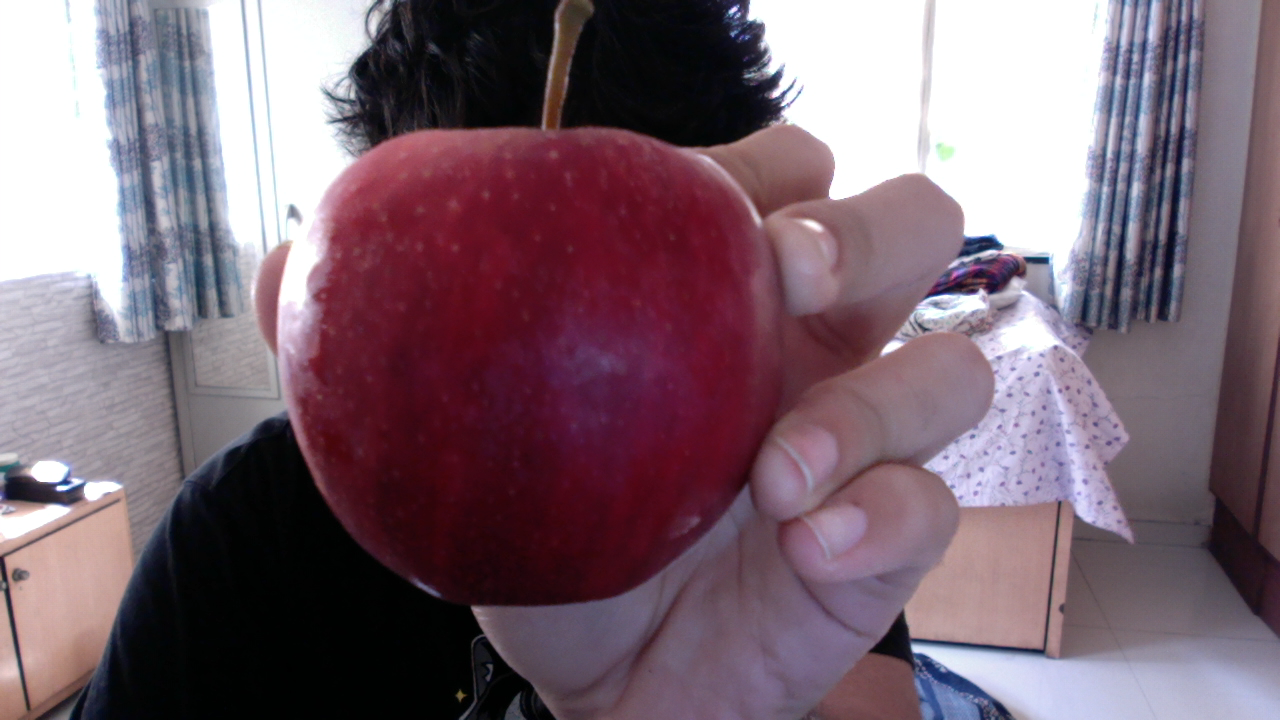

In [8]:
fruit_pic = "/Users/souravmohile/Academics/Codingwoding/jupyter_projects/FruitMaturityDetectorFYProject/opencv_frame_0.png"
img123(filename=fruit_pic) 

In [9]:
model_predict(fruit_pic)

2023-03-14 10:15:57.859241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 192ms/step


'Orange Unripe'

In [ ]:
12